In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('images/sachin.jpg')

### Averaging kernel

In [3]:
# define the averaging kernel
kernel =np.ones([9, 9]) * 1/81  # 9*9=81

In [4]:
kernel

array([[0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],


In [5]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .
    .   The function does actually compute correlation, not the convolution:
    .
    .   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    .
    .   Th

In [6]:
smoothened_image = cv2.filter2D(img, -1, kernel)

In [7]:
cv2.imshow('Blurred Image',smoothened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### gaussian kernel

In [8]:
kernal_size= 5
sigma = 0.35 * ((kernal_size - 1) * 0.5 - 1) + 0.9    #formula of gaussian distribution
kernal = cv2.getGaussianKernel(kernal_size, sigma)

In [9]:
kernal

array([[0.09242116],
       [0.24137602],
       [0.33240563],
       [0.24137602],
       [0.09242116]])

In [10]:
sigma     #standard deviation

1.25

In [11]:
gauss_image = cv2.filter2D(img, -1, kernal)

In [12]:
cv2.imshow('Blurred Image', gauss_image)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [13]:
new_img = np.hstack([img, gauss_image])
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

### Median Blur

In [14]:
gray = cv2.imread('images/sachin.jpg',0)

In [15]:
gray.shape

(1075, 850)

In [16]:
img_med = cv2.medianBlur(gray,5) # 5 --> kernel size as we increase it blurring effect increases

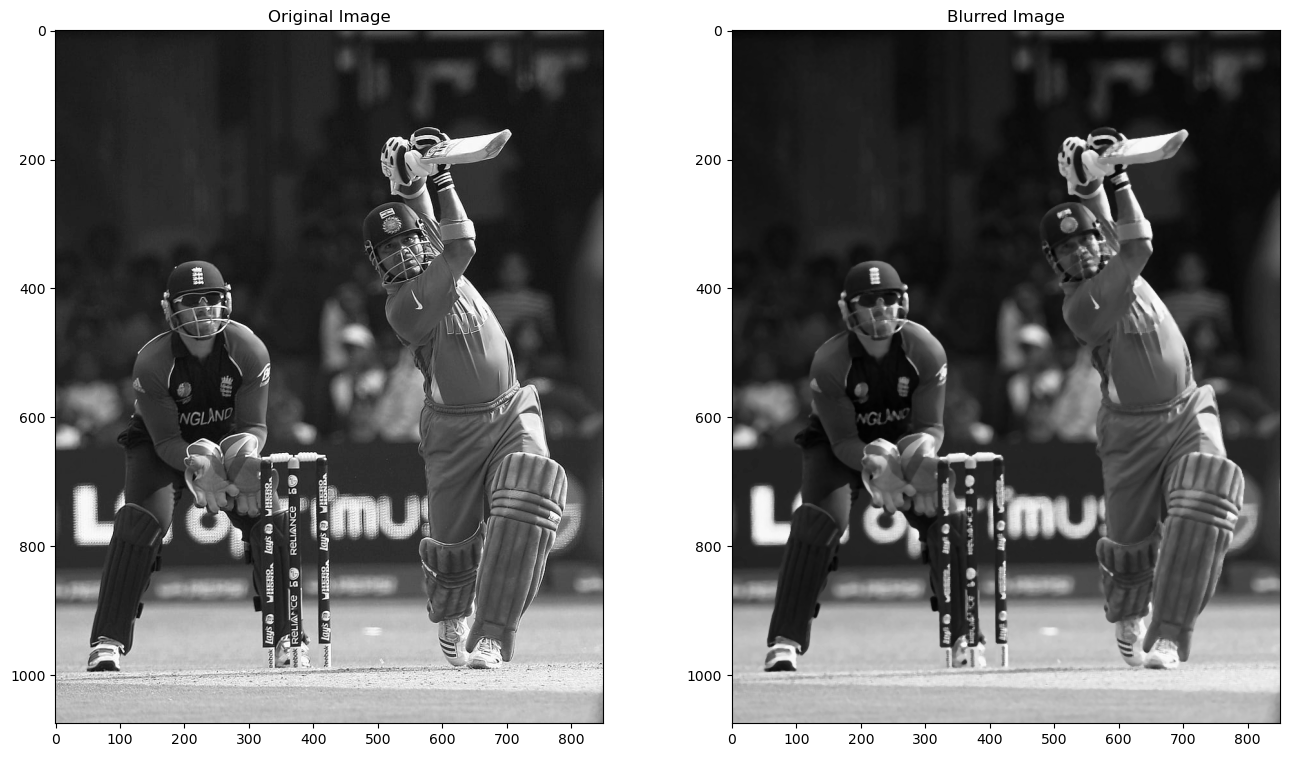

In [17]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.title('Blurred Image')
plt.imshow(img_med,cmap='gray')

In [20]:
new_gray = gray.copy()
patch = gray[500:700, 200:600]

In [21]:
blurred_patch = cv2.medianBlur(patch,5)

In [22]:
gray[500:700, 200:600] = blurred_patch

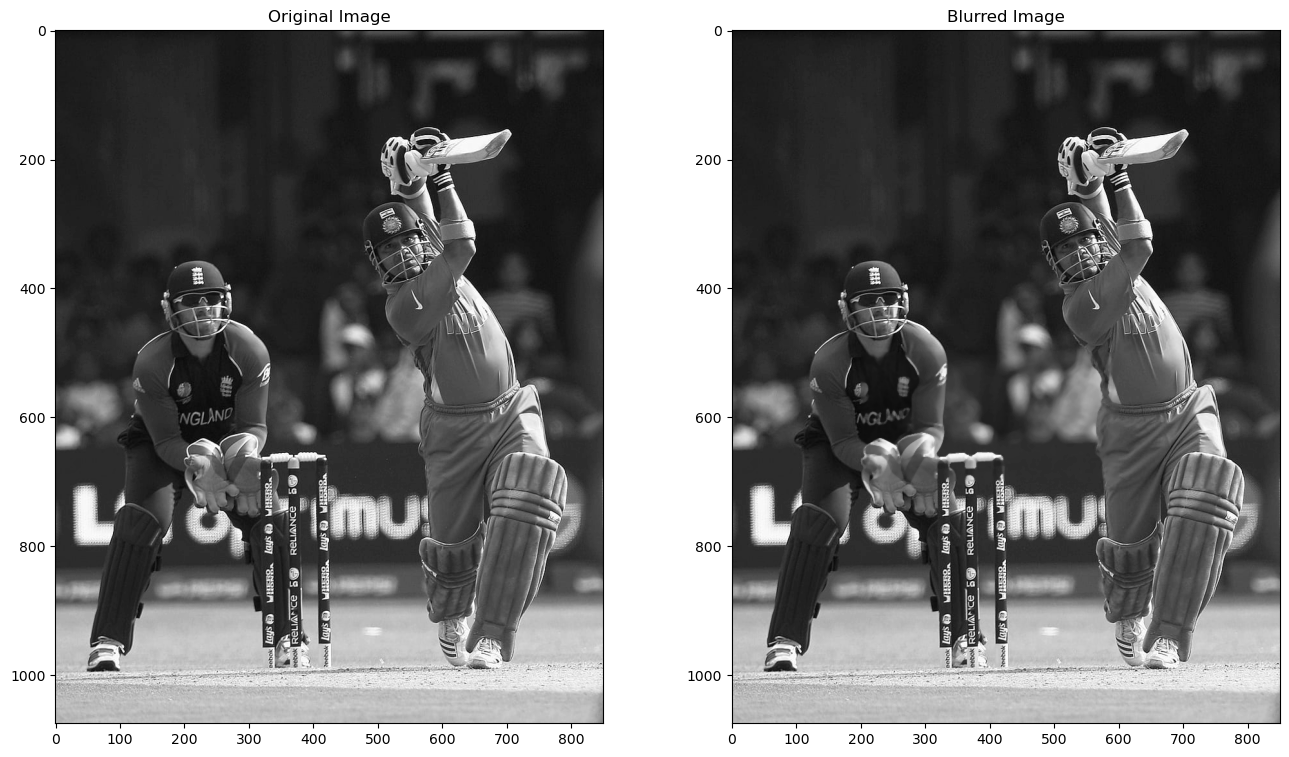

In [23]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(new_gray,cmap='gray')
plt.subplot(1,2,2)
plt.title('Blurred Image')
plt.imshow(gray,cmap='gray')